## Ai | TensorFlow: ML & Neurons

## References
* https://www.tensorflow.org
* https://en.wikipedia.org/wiki/TensorFlow
* https://www.udemy.com/course/deep-learning-tensorflow-2
* https://github.com/huggingface/transformers

### DATA
Ref: https://docs.google.com/document/d/1S7fAvk-MTUymxVB-FpG-fwlx6qR0ziNmK2Wp1BQbpzE/edit#

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/TensorFlow_logo.svg/1920px-TensorFlow_logo.svg.png' height='250px'>

# Classification Theory

Linear classification:
1. Load: Data(x, y)
2. Instantiate: Model
3. Train: fit(Model)
4. Evaluate: Model

In [1]:
## Classification Theory | LOAD DATA(x, y)

# Load Data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


# Check Data
data_type = type(data) # Object Type?
data_key = data.keys() # Dictionary Keys
# data['data'] # Return Data to console: Method 1
# data.data # Return Data to console: Method 1
data_shape = data.data.shape # Return number of Samples & Features
print(f'''Check Data
      The Data Type: {data_type}
      The Keys: {data_key}
      The number of Samples:{data_shape[0]}
      The number of Features:{data_shape[1]}\n\n''')
# Check Target
target_data = data.target[17:33] # Return target data sample
target_shape = data.target.shape # Return array shape
target_key = data.target_names # Return Keys for data
print(f'''Data Target
      The Target Name Key: {target_key}
      The Data: {target_data}
      The Target Shape: {target_shape}\n\n''')
# Data
data_sample = data.data[1] # Return sample of data
data_key = data.feature_names # Return Headers
print(f'''Data
      The Target Name Key: {data_key}
      The Data: {data_sample}\n\n''')


# Training DATA split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.33
) # Define train and test data
N, D = x_train.shape # Training data shape
print(f'''Training Data Shape
      Samples: {N}
      Features: {D}\n\n''')


# Process Data
from sklearn.preprocessing import StandardScaler # Z-Score applied to column
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(f'''Standardized Data: Z-Score(-σ µ +σ)
      Train: {x_train[0]}
      Test: {x_test[0]}\n\n''')

Check Data
      The Data Type: <class 'sklearn.utils._bunch.Bunch'>
      The Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
      The number of Samples:569
      The number of Features:30


Data Target
      The Target Name Key: ['malignant' 'benign']
      The Data: [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
      The Target Shape: (569,)


Data
      The Target Name Key: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
      The

Epoch 1/100
12/12 [==============================] - 1s 26ms/step - loss: 0.9941 - accuracy: 0.2966 - val_loss: 0.9928 - val_accuracy: 0.2872
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8922 - accuracy: 0.3491 - val_loss: 0.8879 - val_accuracy: 0.3404
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8007 - accuracy: 0.4357 - val_loss: 0.7941 - val_accuracy: 0.4468
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7208 - accuracy: 0.5092 - val_loss: 0.7120 - val_accuracy: 0.5479
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6325 - val_loss: 0.6427 - val_accuracy: 0.6170
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5913 - accuracy: 0.6955 - val_loss: 0.5844 - val_accuracy: 0.6968
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5430 - accuracy: 0.7559 - val_loss: 0.5336 - val_accuracy: 0.7766
Epoch 8/100


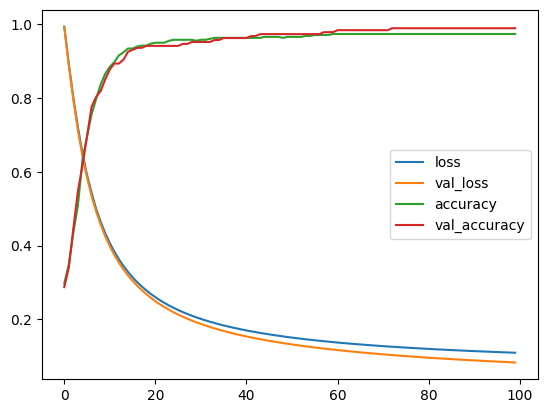

In [2]:
import tensorflow as tf


## Classification Theory | Instantiate MODEL
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid'),
]) # Define ML model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
) # Save the ML model


## Classification Theory | Train & Fit MODEL
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)
print(f'''\n\nResults [loss, accuracy]
      Train Score\n{model.evaluate(x_train, y_train)}
      Test Score\n{model.evaluate(x_test, y_test)}''')


## Classification Theory | Evaluate Model
import matplotlib.pyplot as plt
def chart():
    plt.plot(r.history['loss'], label='loss')
    plt.plot(r.history['val_loss'], label='val_loss')
    plt.plot(r.history['accuracy'], label='accuracy')
    plt.plot(r.history['val_accuracy'], label='val_accuracy')
    plt.legend()
chart()

# Regression Theory

Linear regression:
1. Load: Data(x, y)
2. Instantiate: Model
3. Train: fit(Model)
4. Evaluate: Model

In [3]:
# Dependencies
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

[[       2017  4300000000]
 [       2017 18000000000]
 [       2017 19200000000]
 [       2018  8876000000]
 [       2018 23600000000]]


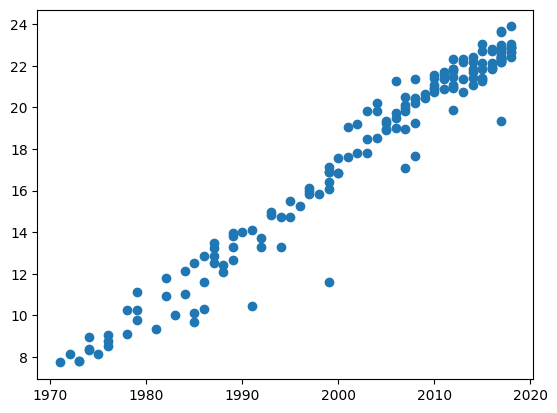

In [4]:
## Load & Transform Data

data = pd.read_csv(
        'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv', 
        header=None
    ).to_numpy() # Get DATA
print(data[(len(data)-1)-5:(len(data)-1)])

x = data[:,0].reshape(-1, 1) # Making x a 2D array; N x D matrix
y = data[:,1]
y_origin = y
y = np.log(y) # Make the DATA linear

## Visualize data
scatter_linear = plt.scatter(x,y)
scatter_linear

# Standardize the Data
x = (x - x.mean()) # / x.std()


# Instantiate Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=1,),
    tf.keras.layers.Dense(1),
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9), # When you 'standardize' Z-Score the data you can simply pass 'adam'
    loss='mse',
) # Save the model

def schedule(epoch, lr):
    '''Learning Rate Schedule Input: Step Iteration'''
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

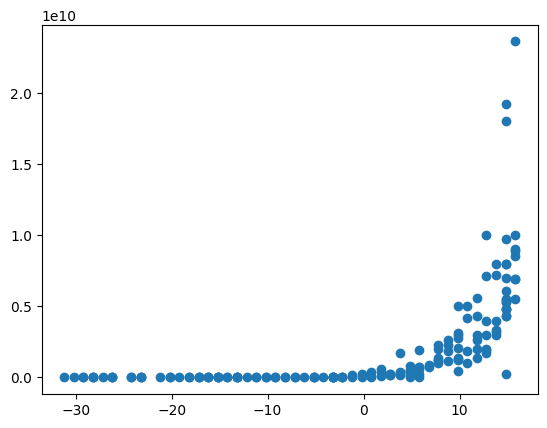

In [5]:
## Visualize data
scatter_linear = plt.scatter(x,y_origin)
scatter_linear

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 327.1489 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 290.3458 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 264.6663 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 202.5548 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 146.5259 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 114.0956 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 996us/step - loss: 92.7524 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 66.1131 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 50.1327 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1000us/step - loss: 35.7431 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - lo

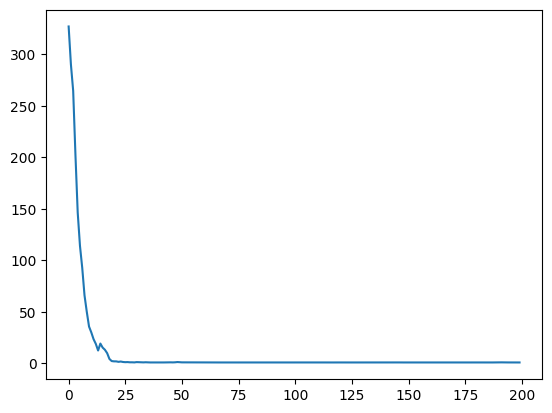

In [6]:
# Train Model
r = model.fit(x, y, epochs=200, callbacks=[scheduler]) # You must test the data to find the epochs

## Visualize data
plot_loss = plt.plot(r.history['loss'], label='loss')
plot_loss

In [7]:
# Data Analysis
layers = model.layers[0].get_weights()
a = model.layers[0].get_weights()[0]
time = np.log(2) / a

print(f'''Data Analysis
      layers\n{layers}
      a\n{a}
      time\nTime To Double: {time} Years''')

Data Analysis
      layers
[array([[0.3362206]], dtype=float32), array([17.765562], dtype=float32)]
      a
[[0.3362206]]
      time
Time To Double: [[2.0615845]] Years


In [8]:
x = x.flatten()
denominator = x.dot(x) - x.mean() * x.sum()
a = ( x.dot(y) - y.mean() * x.sum() ) / denominator
b = ( y.mean() * x.dot(x) - x.mean() * x.dot(y) ) / denominator

print(f'''Data Analysis
      denominator\n{denominator}
      layers\n{layers[0]}, {layers[1]}
      ab\n{a}, {b}
      Time To Double\n {time} Years
      ''')

Data Analysis
      denominator
30173.679012345685
      layers
[[0.3362206]], [17.765562]
      ab
0.34168248738731305, 17.764939393631767
      Time To Double
 [[2.0615845]] Years
      
